### Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("googleplaystore.csv")
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# data format change
waste_data=df[pd.to_datetime(df["Last Updated"],errors="coerce").isna()]
df.drop(waste_data.index,inplace=True)
df.reset_index(drop=True)
df.head()
# df["Last Updated"].unique()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df[pd.to_datetime(df["Last Updated"],errors="coerce").isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [7]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  object        
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  object        
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.2+ MB


In [9]:
df["day"]=df["Last Updated"].dt.day
df["month"]=df["Last Updated"].dt.month
df["year"]=df["Last Updated"].dt.year

In [10]:
df.drop(axis=1,inplace=True,columns=["Last Updated"])

In [11]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [12]:
# Review check
(df["Reviews"].str.isnumeric()==False).sum()

0

In [13]:
df["Reviews"].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
4272        1
5517        1
4057        1
459797      1
398307      1
Name: count, Length: 6001, dtype: int64

In [14]:
df["Reviews"]=df["Reviews"].astype(int)

In [15]:
# Size checking
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
df["Size"].isnull().sum()

0

In [ ]:
def convert_to_number(s):
	if(type(s)==int): return s
	s=s.strip()
	s=s.replace(".","")
	s=s.replace("M","000")
	s=s.replace("k","")
	if(s=="Varies with device"): return 0
	return int(s)

df["Size"]=df["Size"].apply(convert_to_number)

df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [27]:
# Installs check

def convertion_for_installs(s):
	if(type(s)==int): return s
	s=s.strip()
	s=s.replace("+","")
	s=s.replace(",","000")
	return int(s)

df["Installs"]=df["Installs"].apply(convertion_for_installs)
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  int64  
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  day             10840 non-null  int32  
 13  month           10840 non-null  int32  
 14  year            10840 non-null  int32  
dtypes: float64(1), int32(4), int64(2), object(8)
memory usage: 1.2+ MB


In [26]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [30]:
def convertion_for_price(s:float):
	if(type(s)==float or type(s)==int): return s
	s=s.strip()
	s=s.replace("$","")
	return float(s)

df["Installs"]=df["Installs"].apply(convertion_for_price)
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


## EDA

In [32]:
df.duplicated().sum()

483

In [33]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [37]:
df.duplicated('App').sum()

698

In [38]:
df.drop_duplicates('App',inplace=True)

In [40]:
df.duplicated('App').sum()
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [41]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [43]:
df['Rating']=df['Rating'].fillna(0)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
day               0
month             0
year              0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int32  
 4   Size            9659 non-null   int64  
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  day             9659 non-null   int32  
 13  month           9659 non-null   int32  
 14  year            9659 non-null   int32  
dtypes: float64(1), int32(4), int64(2), object(8)
memory usage: 1.0+ MB


<Axes: ylabel='count'>

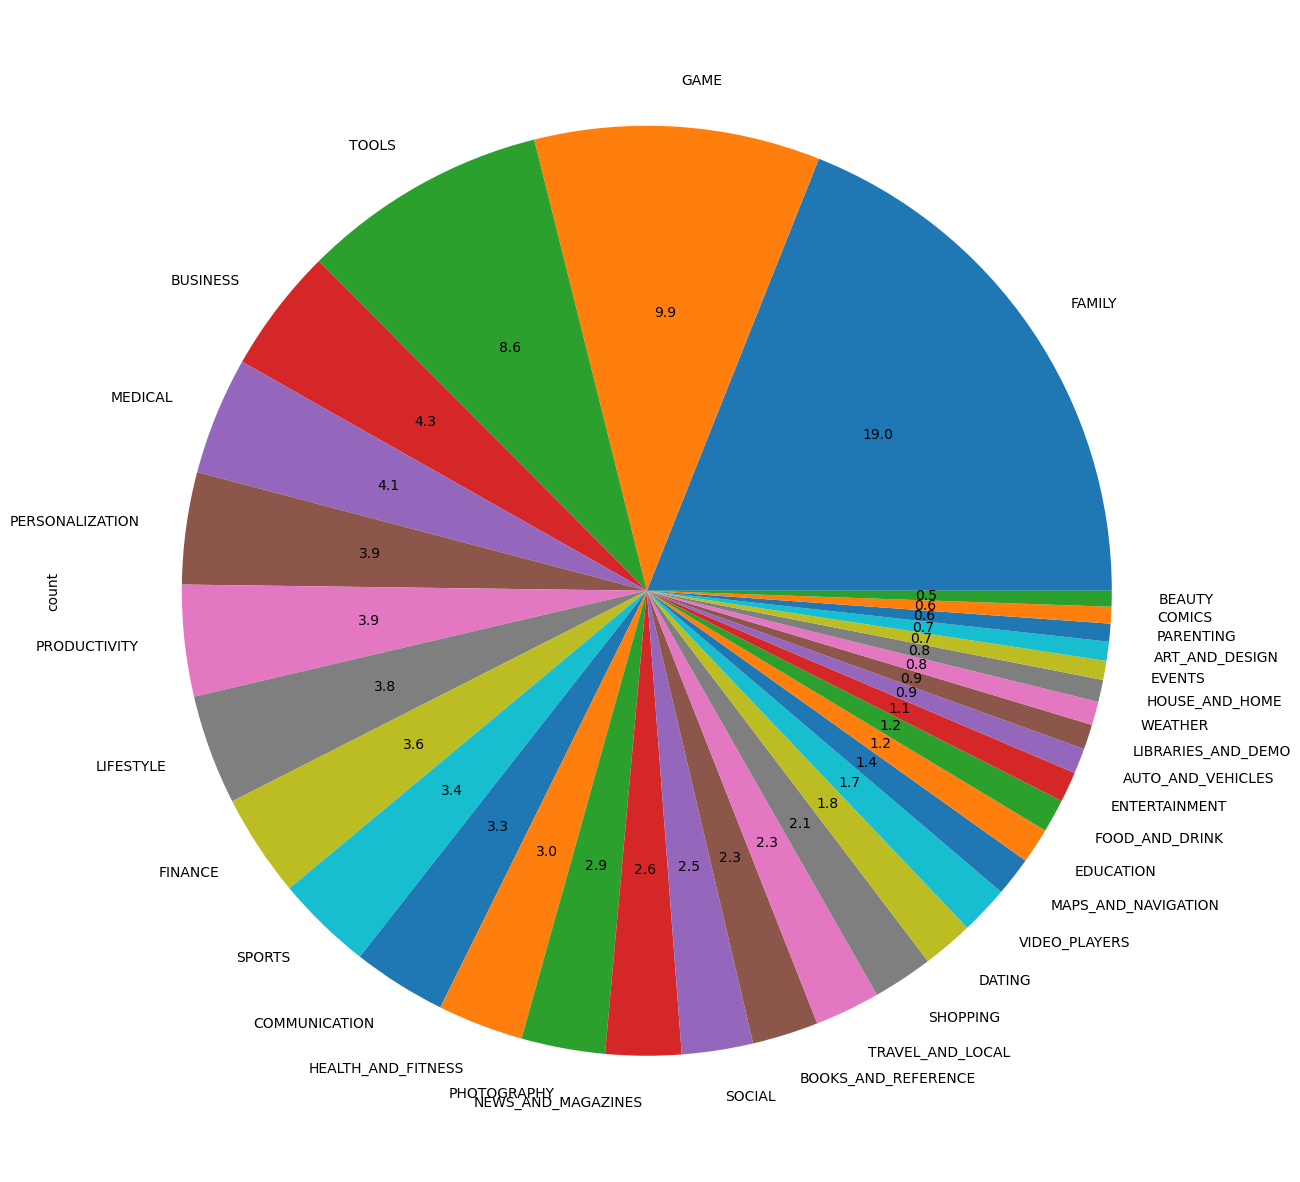

In [60]:
# plt.Figure(figsize=(30,30))
df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(15,16),autopct="%1.1f")
# plt.show()

In [62]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

<Axes: xlabel='Installs', ylabel='Category'>

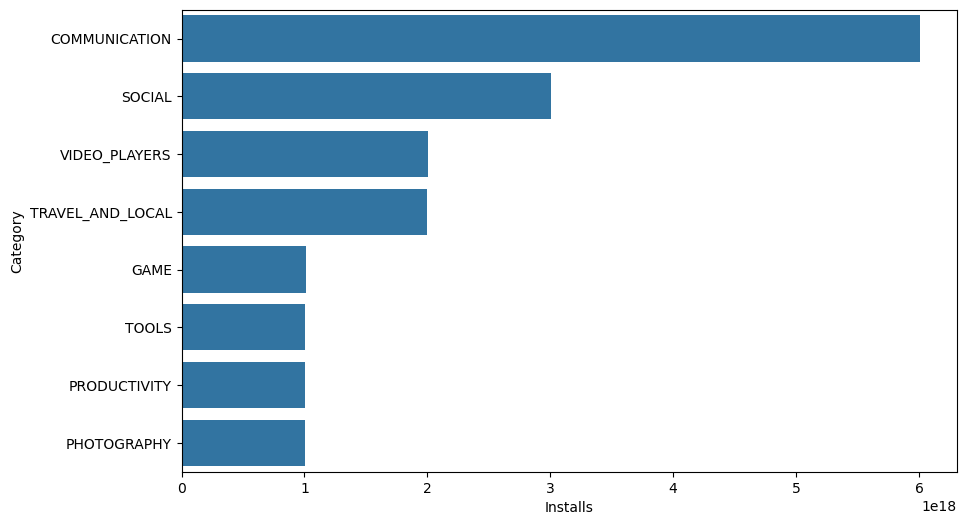

In [76]:
df2=df.groupby(["Category"])["Installs"].sum()
df2=df2.sort_values(ascending=False).reset_index()
df2=df2.head(8)

df2.head()
plt.figure(figsize=(10,6))
sns.barplot(data=df2,y=df2["Category"],x=df2["Installs"])

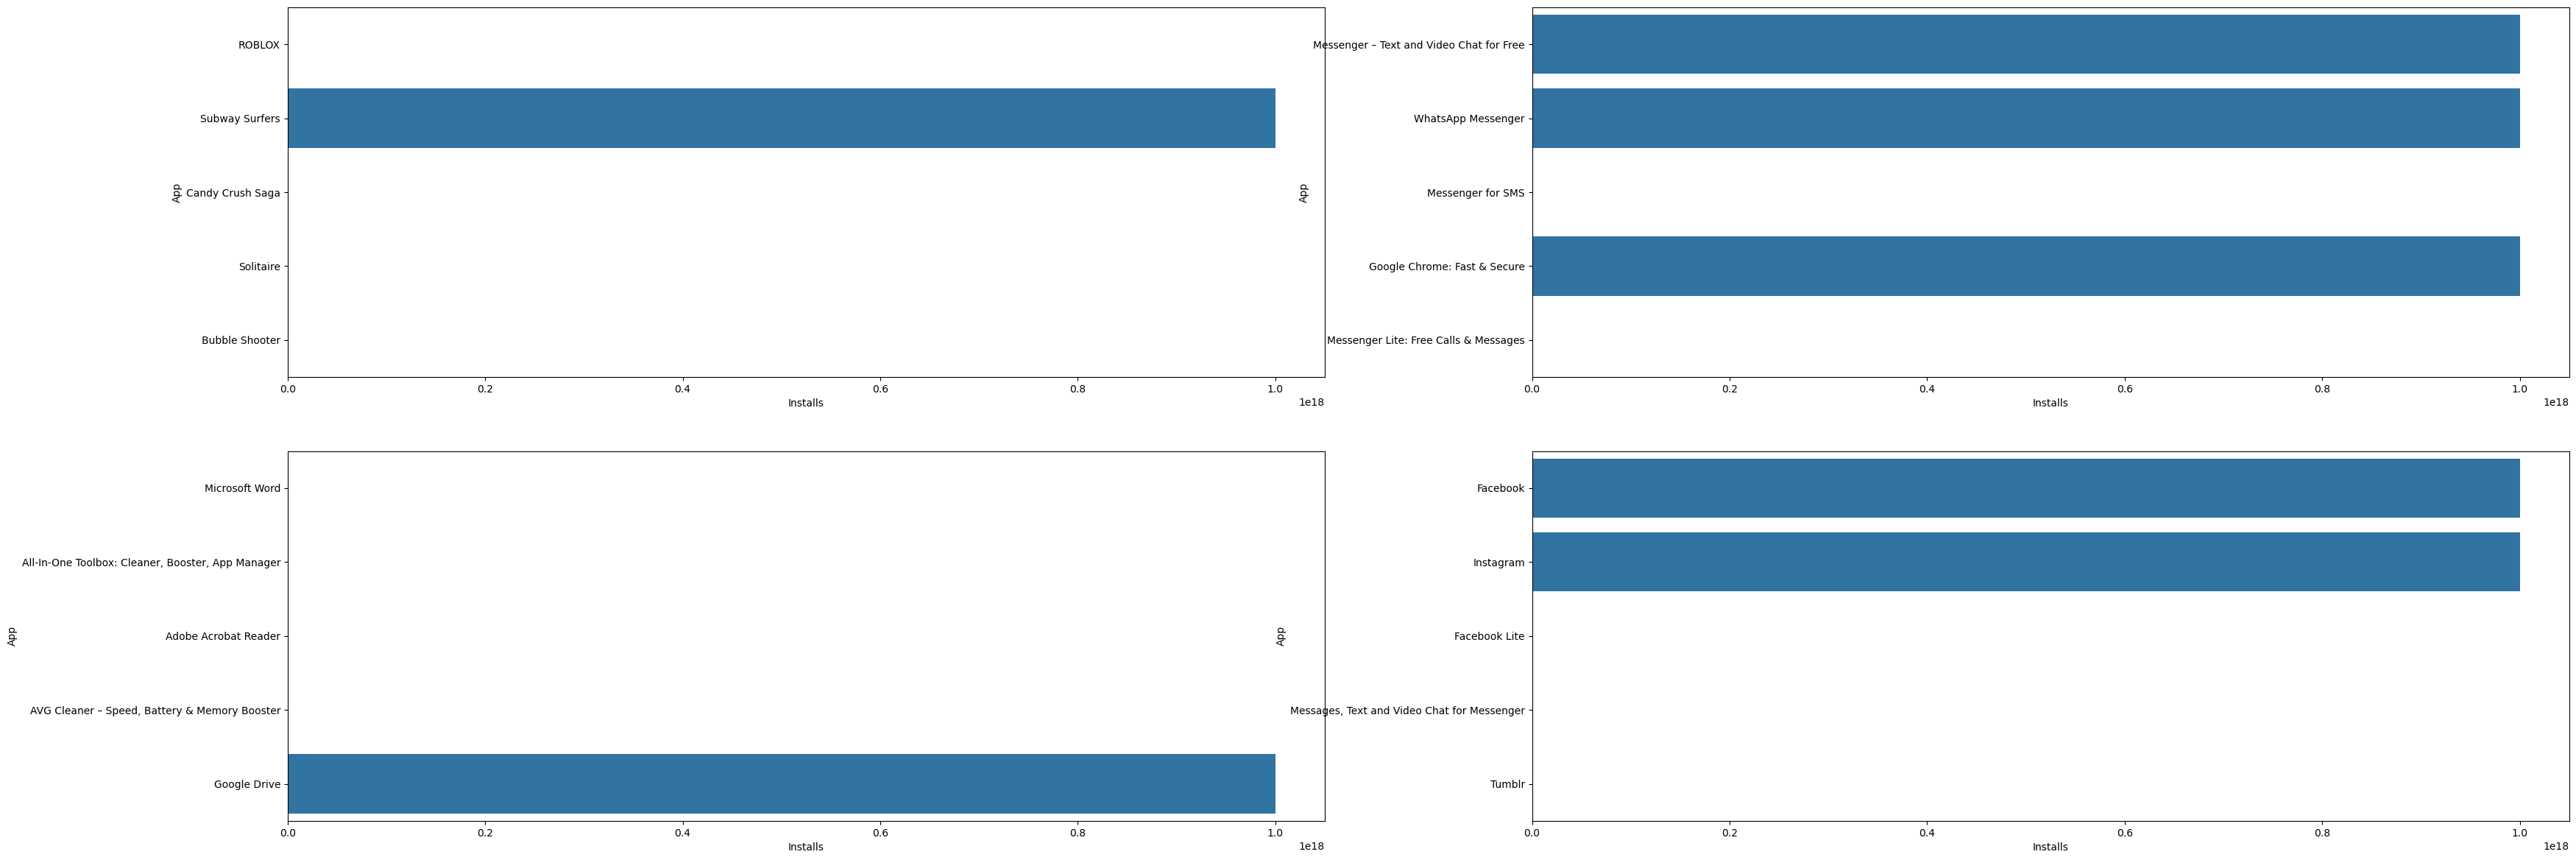

In [82]:
categories=['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]

plt.figure(figsize=(40,30))
for i,ele in enumerate(categories):
	df3= df[df["Category"]==ele]
	df3 = df3.head(5)
	df3["Installs"].sort_values(ascending=False)
	plt.subplot(4,2,i+1)
	sns.barplot(data=df3,y=df3["App"],x=df3["Installs"])